,θ in degrees,Error on θ,Fitted peak centre in channels,Error of the fitted peak centre,Scattered Energy
0,150,1,306,0.359,16.474
1,130,1,308,0.376,16.589
2,110,1,311,0.367,16.763
3,90,1,314,0.349,16.937
4,70,1,318,0.323,17.168
5,50,1,320,0.274,17.284
6,30,1,323,0.244,17.458


0    1.866025
1    1.642788
2    1.342020
3    1.000000
4    0.657980
5    0.357212
6    0.133975
Name: θ in degrees, dtype: float64 0    0.060702
1    0.060281
2    0.059655
3    0.059042
4    0.058248
5    0.057857
6    0.057280
Name: Scattered Energy, dtype: float64 0    0.008726
1    0.013369
2    0.016400
3    0.017452
4    0.016400
5    0.013369
6    0.008726
dtype: float64 0    0.000207
1    0.000206
2    0.000203
3    0.000201
4    0.000198
5    0.000196
6    0.000194
dtype: float64
[1.76573881e-09 2.41157223e-09]
[4.20206950e-05 4.91077614e-05]
fit parameter 1-sigma error
***************************************************
m = 1.9538e-03 +/- 4.2021e-05
c = 5.7056e-02 +/- 4.9108e-05
***************************************************
[0.00199585 0.05710462] [0.00191181 0.0570064 ]
0    0.060829
1    0.060383
2    0.059783
3    0.059100
4    0.058418
5    0.057818
6    0.057372
Name: θ in degrees, dtype: float64 0    0.060574
1    0.060147
2    0.059572
3    0.058918
4    0.0582

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.05, 'Graph of $1/E_{out}$ against $1-\\cos \\theta$')

Text(0.5, 0, '$1-\\cos \\theta$')

Text(0, 0.5, '$1\\ / \\ E_{out}$')

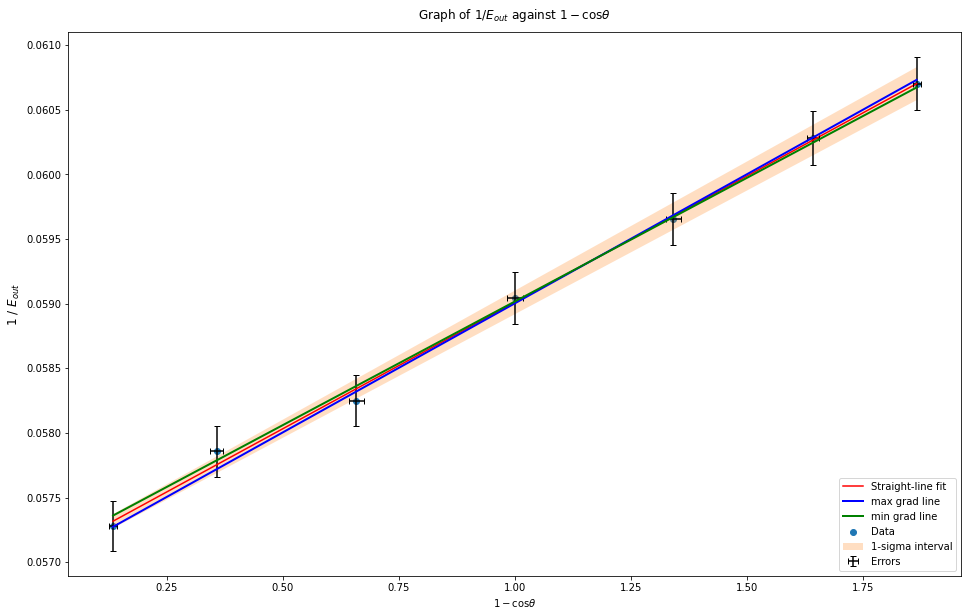

In [168]:
#Plot weighted straight-fit line with x and y errors
#with maximum and minimum gradient lines

#Import packages
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

# Define a simple, straight line model, accepting an x value or 1D array and using 
# gradient and intercept parameters supplied by curvefit(). 
def StrtLineModel(x, m, c):
    y_lin = m*x + c
    return (y_lin)

dfdata
theta = dfdata["θ in degrees"]*(np.pi)/180 #convert degrees to radians
theta_error = dfdata["Error on θ"]*(np.pi)/180 #convert degrees to radians
x =1-np.cos(theta)
y=1/dfdata["Scattered Energy"]
n1_error=0.282/(322-0.282)
n2_error=1.53/(360-1.53)
xerror = abs((np.cos(theta+theta_error)-np.cos(theta-theta_error))/2)
n_perc=dfdata["Error of the fitted peak centre"]/(dfdata["Fitted peak centre in channels"]-dfdata["Error of the fitted peak centre"])
yerror_per=np.sqrt((n_perc-n1_error)**2+(n2_error-n1_error)**2)
yerror=y*yerror_per
print(x, y, xerror,yerror)


# Call the fitting function - which returns two objects. The variables 'popt' and 'pcov' 
# are called this by convention but any names would do.
popt, pcov = curve_fit(StrtLineModel, x, y)

# Calculate the errors on the returned parameters
perr = np.sqrt(np.diag(pcov)) # squares of the error values are 
                              # on the covariance matrix diagonal

print(np.diag(pcov))
print(perr)
# For readability, extract values from popt and perr into named variables
m_fit = popt[0]
c_fit = popt[1]
m_err = perr[0]
c_err = perr[1]
    
# Now we can print out the optimised fit parameters and 1-sigma estimates
print('fit parameter 1-sigma error')
print('***************************************************')
print (f'm = {m_fit:.4e} +/- {m_err:.4e}')
print (f'c = {c_fit:.4e} +/- {c_err:.4e}')
print('***************************************************')

# Calculate the errors on the returned parameters
perr = np.sqrt(np.diag(pcov)) # squares of the error values are 
                              # on the covariance matrix diagonal

# prepare confidence level line limits
nstd = 1.0 # to draw 1 sigma interval

# Calculate m and c values for upper and lower limit lines
# These are NumPy arrays so can carry out array calculations on them
# - print them out if you want, to inspect the contents
popt_upper = popt + nstd*perr
popt_lower = popt - nstd*perr


print(popt_upper, popt_lower)
plt.rcParams['figure.figsize'] = [16, 10]

# Calculate y values of the fitted line
y_fit = StrtLineModel(x, *popt)

# Calculate y values of upper and lower bound lines
fit_upper = StrtLineModel(x, *popt_upper)
fit_lower = StrtLineModel(x, *popt_lower)
print(fit_upper, fit_lower)

# To make a labelled plot, need access to the 
# figure and axes objects:
fig, ax = plt.subplots(1)    

plt.scatter(x, y, label="Data")
plt.plot(x, StrtLineModel(x, m_fit, c_fit), color="red", label= "Straight-line fit")
plt.errorbar(x, y, yerr = yerror, xerr = xerror, capsize = 3, fmt = 'none', ecolor = 'k', label = 'Errors')

plt.title("Graph of " r"$1/E_{out}$" " against " r"$1-\cos \theta$", y=1.05, pad=-14)
plt.xlabel(r"$1-\cos \theta$", fontsize = 10)
plt.ylabel(r"$1\ / \ E_{out}$", fontsize = 12)

#plot maximum and minimum gradient lines
plt.plot(x, StrtLineModel(x, m_fit+m_err, c_fit-c_err), 'b', lw = 2, label = 'max grad line')
plt.plot(x, StrtLineModel(x, m_fit-m_err, c_fit+c_err), 'g', lw = 2, label = 'min grad line')

# Draw shaded area between upper and lower limit lines
ax.fill_between(x, fit_upper, fit_lower, alpha = .25, label = '1-sigma interval')

plt.legend(loc = 'lower right')

plt.savefig("Straight-Line fit max min", dpi=300)

plt.show()


In [155]:
#Calibrate x axis of the graphs - calibrate channels to energy keV 
#and insert a column to the csv files

def Cal_Formula(n):
    E1=17.4#keV
    E2=19.6#keV
    n1=322
    n2=360
    E_out = E1+(n-n1)*((E2-E1)/(n2-n1))
    return E_out

dfdata=pd.read_csv('calibration.csv',sep=',', header=0)
dfdata
channel=dfdata["Channel"]
dfdata["Energy"]= Cal_Formula(channel)

dfdata.to_csv('calibration.csv', mode='a', index=False, header=False)
dfdata


,Channel,Counts,Unnamed: 2,Setting,Value
0,1,23,NaN,Detector angle,0.0
1,2,10,NaN,Target angle,-90.0
2,3,1,NaN,Voltage (kV),30.0
3,4,0,NaN,Current (mA),0.1
4,5,1,NaN,Gate time (s),300.0
...,...,...,...,...,...
507,508,18,NaN,NaN,NaN
508,509,18,NaN,NaN,NaN
509,510,14,NaN,NaN,NaN
510,511,13,NaN,NaN,NaN


,Channel,Counts,Unnamed: 2,Setting,Value,Energy
0,1,23,NaN,Detector angle,0.0,-1.184211
1,2,10,NaN,Target angle,-90.0,-1.126316
2,3,1,NaN,Voltage (kV),30.0,-1.068421
3,4,0,NaN,Current (mA),0.1,-1.010526
4,5,1,NaN,Gate time (s),300.0,-0.952632
...,...,...,...,...,...,...
507,508,18,NaN,NaN,NaN,28.168421
508,509,18,NaN,NaN,NaN,28.226316
509,510,14,NaN,NaN,NaN,28.284211
510,511,13,NaN,NaN,NaN,28.342105
